## Text Analysis(Sentiment analysis & Topic Modeling)

Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from textblob import TextBlob
from collections import Counter

Datasets for NLTK

In [2]:
nltk.download('punkt')  # Download the tokenization data
nltk.download('stopwords')  # Download the stopwords data
nltk.download('averaged_perceptron_tagger')  # Download the part-of-speech tagging data
nltk.download('maxent_ne_chunker')  # Download the named entity recognition data
nltk.download('words')  # Download the words corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Load the CSV file into a pandas DataFrame

In [3]:
file_path = '../data/raw_analyst_ratings.csv'
# file_path = '../data/new-data.csv'
df = pd.read_csv(file_path)

### Sentiment Analysis

Define a function to perform sentiment analysis on headlines

In [4]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

Apply the sentiment analysis function to the 'headline' column

In [5]:
df['sentiment'] = df['headline'].apply(get_sentiment)

Print or visualize the results

sentiment
Neutral     382
Positive    107
Negative     26
Name: count, dtype: int64


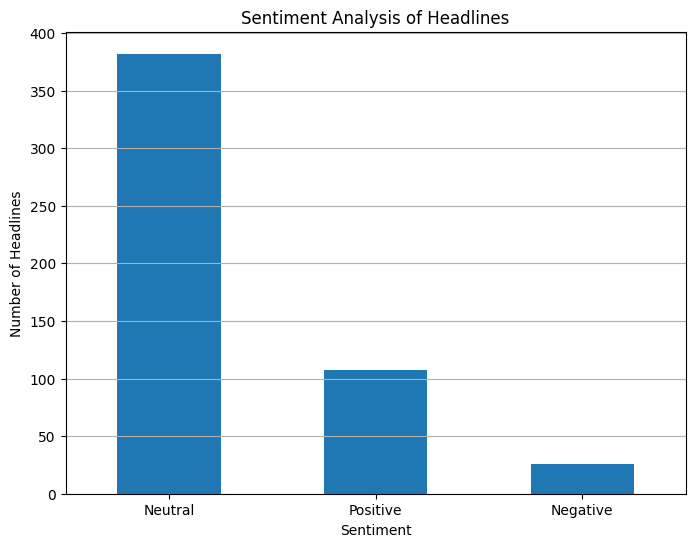

In [6]:
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print(sentiment_counts)

# Optionally, plot a bar chart of sentiment counts
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Keyword and Phrase Identification

Define text preprocessing function

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

Define extract keywords/phrases functions

In [ ]:
def extract_keywords(text):
    # Preprocess the text
    tokens = preprocess_text(text)
    # Get part-of-speech tags
    tagged_tokens = pos_tag(tokens)
    # Extract named entities
    named_entities = ne_chunk(tagged_tokens)
    # Extract keywords (nouns and named entities)
    keywords = [token for token, tag in tagged_tokens if tag.startswith('N') or tag == 'NNP']
    # Extract phrases (noun phrases and named entities)
    phrases = [' '.join([token for token, tag in chunk.leaves()]) for chunk in named_entities if hasattr(chunk, 'label') and chunk.label() == 'NE']
    return keywords + phrases

Apply keyword and phrase extraction to the 'headline' column

In [ ]:
df['keywords'] = df['headline'].apply(extract_keywords)

Print or visualize the results

agilent         201
technologies    159
vs               93
stocks           80
sales            68
eps              68
target           48
shares           47
price            47
earnings         46
Name: count, dtype: int64


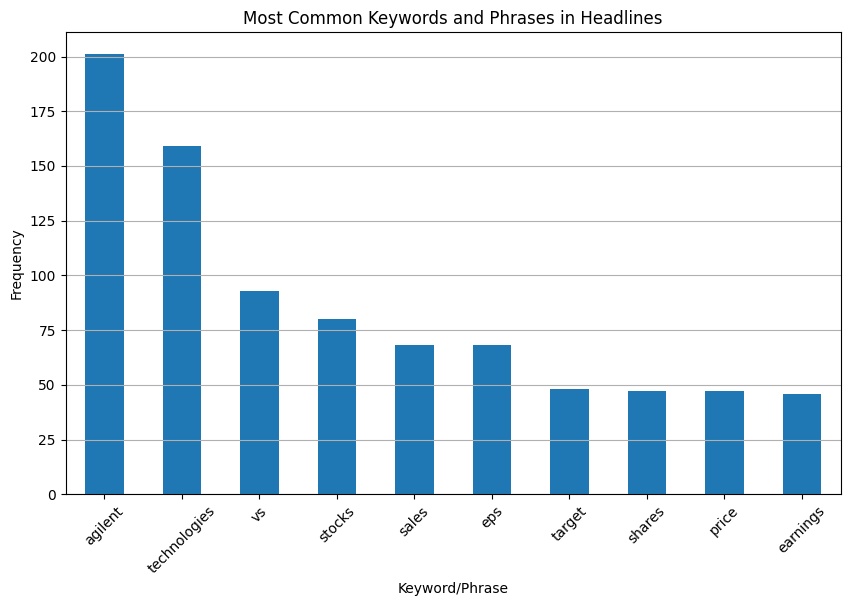

In [7]:
# Flatten the list of keywords and phrases
all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]

# Get the most common keywords and phrases
common_keywords = pd.Series(all_keywords).value_counts().head(10)

# Print the most common keywords and phrases
print(common_keywords)

# Optionally, plot a bar chart of the most common keywords and phrases
common_keywords.plot(kind='bar', figsize=(10, 6))
plt.title('Most Common Keywords and Phrases in Headlines')
plt.xlabel('Keyword/Phrase')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
